In [91]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# import overpy not using, wasn't giving nds, which we need for ordering
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
import sys
sys.path.append(f'/home/beans/bespoke')

from map_utils import *
from big_map_utils import *

In [93]:
%%time

lats, lons, way_ids = get_big_map()

lats.shape, lons.shape, way_ids.shape #TODO stack these three arrays together for better perf later, slight

CPU times: user 219 ms, sys: 24 ms, total: 243 ms
Wall time: 427 ms


((24204,), (24204,), (24204,))

CPU times: user 8.19 ms, sys: 3.67 ms, total: 11.9 ms
Wall time: 11.2 ms


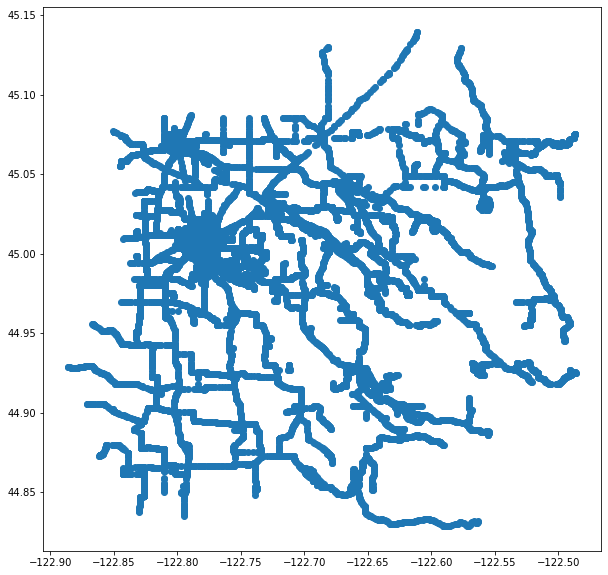

In [94]:
%%time
plt.figure(figsize=(10,10))
plt.scatter(lons, lats)

In [95]:
# Narrowing down to window around vehicle. 
# Everything below will be called every frame, so it should take only a few ms as to not impede on our 50ms modeld loop

#current_lat, current_lon = 44.973490, -122.645679 #nabq curves
current_lat, current_lon = 45.023867, -122.741862 # start sabq
vehicle_heading = .7 #+ np.pi/2 # need this hardcoded rotater

In [96]:
current_x, current_y = current_lon, current_lat
all_xs, all_ys = lons, lats

In [97]:
xs, ys, way_ids = prepare_small_map_nodes(all_xs, all_ys, way_ids, current_x, current_y, vehicle_heading, CLOSE_BUFFER)
xs.shape, ys.shape, way_ids.shape

((40,), (40,), (40,))

CPU times: user 10.4 ms, sys: 0 ns, total: 10.4 ms
Wall time: 9.79 ms


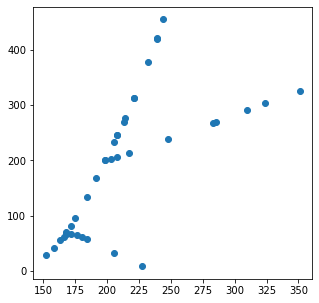

In [98]:
%%time
plt.figure(figsize=(5,5))
plt.scatter(xs, ys)

In [99]:
small_map = draw_small_map(xs, ys, way_ids)
small_map.shape

(120, 80, 3)

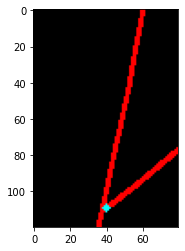

In [100]:
plt.imshow(small_map)

In [101]:
xs, ys = [10,20,30,40,50,60], [10,20,30,40,50,60]
pts = np.stack([xs, ys], axis=-1)
pts.shape

(6, 2)

In [102]:
pts = pts.reshape((-1, 1, 2))  # quirk of cv2
pts.shape

(6, 1, 2)

In [103]:
# Drawing
isClosed = False
color = (255, 0, 0)
thickness = 2

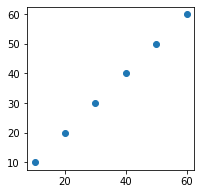

In [104]:
plt.figure(figsize=(3,3))
plt.scatter(xs, ys)

In [105]:
small_map = np.zeros((60, 60, 3), dtype='uint8') 

In [106]:
small_map = cv2.polylines(small_map, [pts], isClosed, color, thickness)

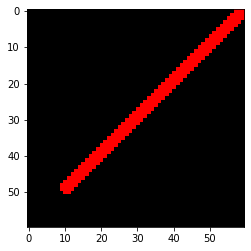

In [107]:
plt.imshow(np.flipud(small_map))